<a href="https://colab.research.google.com/github/Eugenia27/vision/blob/master/trabajo_final_ferraro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Convolucionales en visión por computadoras

## Trabajo Final: Analizando el Amazonas desde el espacio

En este trabajo, utilizaremos imágenes satelitales del Amazonas para entrenar un modelo de Deep Learning que sea capaz de darnos información acerca del contenido de las mismas.

### Imágenes

Trabajaremos con más de 40.000 imágenes satelitales en RGB donde cada píxel representa un área de 3.7 metros. Los datos provienen de los satélites Flock 2 de la compañía Planet, recolectados entre el 1 de Enero de 2016 y el 1 de Febrero de 2017. Todas las escenas provienen de la cuenca del Amazonas que incluye Brasil, Perú, Uruguay, Colombia, Venezuela, Guyana, Bolivia y Ecuador.

### Etiquetas

Las clases a predecir para cada imágen representan un conjunto de fenómenos de interés que se desean analizar en el Amazonas. Estas etiquetas pueden distribuirse en tres grupos:

- Condiciones atmosféricas
- Fenómenos comunes de cobertura/uso de suelo
- Fenómenos raros de cobertura/uso de suelo

Cada imágen tendrá al menos una, y potencialmente, más de una etiqueta del tipo de condiciones atmosféricas. Así como también cero o varias etiquetas del tipo de fenómenos comunes o raros de cobertura/uso de suelo. Aquellas imágenes etiquetadas como "cloudy" (nublado), no deberían tener ninguna otra anotación, aunque pueden haber errores de anotación.

Puede ocurrir que en muchas imágenes no se haya taggeado todos los fenómenos observables, como así también puede que haya etiquetas incorrectas. El poder trabajar y solucionar problemas relacionados con datos ruidosos será parte del desafío.

![chips.jpg](attachment:chips.jpg)
*Ejemplo de imágenes y sus etiquetas*

Trabajaremos con un total de 17 etiquetas posibles, descritas a continuación:

- **Cloudy:** Imagen completamente nublada que no permite obtener observaciones adicionales.
- **Partly Cloudy:** Imagen parcialmente nublada.
- **Clear:** Imagen sin nubes.
- **Haze:** Imagen con neblina.
- **Primary (rainforest):** Presencia de bosque "virgen" o áreas con alta densidad de vegetación.
- **Water:** Presencia de ríos, embalses o lagos.
- **Habitation:** Presencia de casas o edificios.
- **Agriculture:** Porciones de tierra sin árboles siendo utilizadas para la agricultura.
- **Road:** Caminos o rutas.
- **Cultivation:** Es un subconjunto de Agriculture que se refiere a pequeñas granjas siendo explotadas por una persona o familia como medio de supervivencia.
- **Bare Ground:** Áreas sin presencia de árboles por causas naturales y no como resultado de la actividad humana.
- **Slash and Burn:** Áreas que han sido incendiadas recientemente.
- **Selective Logging:** Zonas de tala selectiva de especies de árboles de alto valor.
- **Blooming:** Es un fenómeno natural donde ciertas especies de árboles, eclosionan, dan frutos y florecen para aumentar las chances de polinización cruzada.
- **Conventional Mining:** Zona con presencia de minería legal a larga escala.
- **"Artisinal" Mining:** Operaciones de minería a baja escala, usualmente ilegales.
- **Blow Down:** Fenómeno natural que ocurre cuando el aire frío y seco de los Andes se asienta sobre el aire cálido y húmedo en la selva. Estos fuertes vientos derriban los árboles más grandes de la selva tropical, y las áreas abiertas resultantes son visibles desde el espacio.

### Aclaraciones finales

Tenga en cuenta que este no se trata de un problema de multi-class classification, sino un problema de [multi-label classification](https://en.wikipedia.org/wiki/Multi-label_classification), dónde para cada imágen se puede predecir mas de una categoría o etiqueta.


## Instalación de librerías

Si desea utilizar Google Colab, recomiendo ejecutar este comando para actualizar e instalar la versión 2.0 de `tensorflow-gpu` (la versión instalada por defecto de tensorflow sólo corre en CPU).

In [ ]:
!pip uninstall tensorflow && pip install -U tensorflow-gpu==2.0.0 keras==2.3.1

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 380.8MB 15kB/s 
     |████████████████████████████████| 378kB 44.4MB/s 
     |████████████████████████████████| 3.8MB 42.8MB/s 
     |████████████████████████████████| 450kB 52.6MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
ERROR: fancyimpute 0.4.3 requires tensorflow, which is not installed.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.

In [ ]:
pip install efficient-apriori

## Obtención de datos

Para descargar las imágenes y sus correspondientes etiquetas, puede ejecutar los siguiente comandos directamente desde el notebook.

In [ ]:
# Descargar dataset de imágenes desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM" -O 'train-jpg.tar' && rm -rf /tmp/cookies.txt

--2019-12-16 12:09:32--  https://docs.google.com/uc?export=download&confirm=Joiz&id=1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM
Resolving docs.google.com (docs.google.com)... 173.194.217.101, 173.194.217.102, 173.194.217.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j9daj9tbtcl57s186vuhbqlkv351sc9f/1576497600000/12900783405973182389/*/1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM?e=download [following]
--2019-12-16 12:09:32--  https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j9daj9tbtcl57s186vuhbqlkv351sc9f/1576497600000/12900783405973182389/*/1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM?e=download
Resolving doc-08-2s-docs.googleusercontent.com (doc-08-2s-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-08-2s-docs.googleuserconten

In [ ]:
# Extraemos las imágenes
!tar -xvf train-jpg.tar

train-jpg/
train-jpg/train_21777.jpg
train-jpg/train_34567.jpg
train-jpg/train_7212.jpg
train-jpg/train_11485.jpg
train-jpg/train_14111.jpg
train-jpg/train_8634.jpg
train-jpg/train_27649.jpg
train-jpg/train_8459.jpg
train-jpg/train_12520.jpg
train-jpg/train_25962.jpg
train-jpg/train_14764.jpg
train-jpg/train_17626.jpg
train-jpg/train_25677.jpg
train-jpg/train_9660.jpg
train-jpg/train_1366.jpg
train-jpg/train_26122.jpg
train-jpg/train_24548.jpg
train-jpg/train_17415.jpg
train-jpg/train_25901.jpg
train-jpg/train_23389.jpg
train-jpg/train_25095.jpg
train-jpg/train_12922.jpg
train-jpg/train_19885.jpg
train-jpg/train_37550.jpg
train-jpg/train_21305.jpg
train-jpg/train_40436.jpg
train-jpg/train_31247.jpg
train-jpg/train_1837.jpg
train-jpg/train_6289.jpg
train-jpg/train_36691.jpg
train-jpg/train_16062.jpg
train-jpg/train_28673.jpg
train-jpg/train_22394.jpg
train-jpg/train_14346.jpg
train-jpg/train_13177.jpg
train-jpg/train_12481.jpg
train-jpg/train_3923.jpg
train-jpg/train_36787.jpg
train-jpg

In [ ]:
# Descargar etiquetas desde Google Drive
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UB3LTf73QrXggGQqzUCLjntxmfA90aDb' -O 'train-jpg-labels.pkl'

--2019-12-16 12:09:56--  https://docs.google.com/uc?export=download&id=1UB3LTf73QrXggGQqzUCLjntxmfA90aDb
Resolving docs.google.com (docs.google.com)... 172.217.203.139, 172.217.203.100, 172.217.203.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gb6ke8qmq4jkh0kb5t5uvtjtjlavcvtq/1576497600000/12900783405973182389/*/1UB3LTf73QrXggGQqzUCLjntxmfA90aDb?e=download [following]
--2019-12-16 12:09:56--  https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gb6ke8qmq4jkh0kb5t5uvtjtjlavcvtq/1576497600000/12900783405973182389/*/1UB3LTf73QrXggGQqzUCLjntxmfA90aDb?e=download
Resolving doc-08-2s-docs.googleusercontent.com (doc-08-2s-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-08-2s-docs.googleusercontent.com (doc-08

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Librerias a utilizar

Es obligatorio el uso de `Keras` y `tensorflow` para la creación y entrenamiento de su modelo de Deep Learning.

In [ ]:
import os
import warnings

from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback, CSVLogger, TensorBoard 
import keras
from keras.layers import Activation, BatchNormalization

import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import pandas as pd
import seaborn as sb
import gc
from efficient_apriori import apriori

from numpy.random import seed
seed(113)
from tensorflow import random 
random.set_seed(137)


from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter


plt.rc('text', usetex=False)
font = {'family': 'serif', 'size': 15, 'serif': ['computer modern roman']}
plt.rc('font', **font)
plt.rc('legend', **{'fontsize': 15}) #27 
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.minor.size'] = 2
plt.rc('lines', linewidth=3)


warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


## Exploración y análisis

Utilice esta sección para explorar las imágenes y sus etiquetas asociadas. Sugerencias:

- Analice la distribución de los datos.
    - ¿Está el dataset balanceado?
    - ¿Cuál es el tamaño de las imágenes?
- Analice la correlación entre etiquetas.
- Visualice imágenes y relaciones patrones presentes en cada una.

**Ayuda:** Para cargar las etiquetas recomiendo utilizar la función [read_pickle](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_pickle.html) de la librería `Pandas`.

In [ ]:
Y = pd.read_pickle('train-jpg-labels.pkl')

In [ ]:
Y.head()

image_name                                             tags
0  train-jpg/train_0.jpg                                  [haze, primary]
1  train-jpg/train_1.jpg             [agriculture, clear, primary, water]
2  train-jpg/train_2.jpg                                 [clear, primary]
3  train-jpg/train_3.jpg                                 [clear, primary]
4  train-jpg/train_4.jpg  [agriculture, clear, habitation, primary, road]

In [ ]:
Y['labels'] = Y.tags.apply(lambda x: '|'.join([str(i) for i in x]))

In [ ]:
Y.labels.head()

0                                 haze|primary
1              agriculture|clear|primary|water
2                                clear|primary
3                                clear|primary
4    agriculture|clear|habitation|primary|road
Name: labels, dtype: object

In [ ]:
uniques = Y.drop_duplicates('labels')

In [ ]:
labels = []
for i in range(len(uniques)):
  if i ==0:
    labels = uniques.tags.values[0]
  else:
    list_ = uniques.tags.values[i]
    for label in list_:
      if label in labels: continue
      else:
        labels.append(label)

In [ ]:
labels

['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'blow_down']

In [ ]:
#def frecuencias(_db,_labels):
#  ceros = np.zeros(len(_labels))
#  dic = dict(zip(_labels,ceros))
#  x_,y_ = [],[]

#  for i in range(len(_db)):
#    for j in range(len(_db.tags.values[i])):
#      dic[_db.tags[i][j]] = dic[_db.tags[i][j]]+1 

#  print('pase1')
#  dic = sorted(dic.items(), key=lambda kv: kv[1],reverse=True)

#  print('pase2')
#  for i in range(len(dic)):
#    x_.append(dic[i][0])
#    y_.append(dic[i][1])    

#  print('pase3')
#  return x_,y_

In [ ]:
fr_dataset = []
for l in labels:
  frecuencia_dataset = len(Y[Y.labels.str.contains(r'\b'+l+r'\b')])
  fr_dataset.append(frecuencia_dataset)

fr_dataset,x = zip(*sorted(zip(fr_dataset,labels),reverse=True))  

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


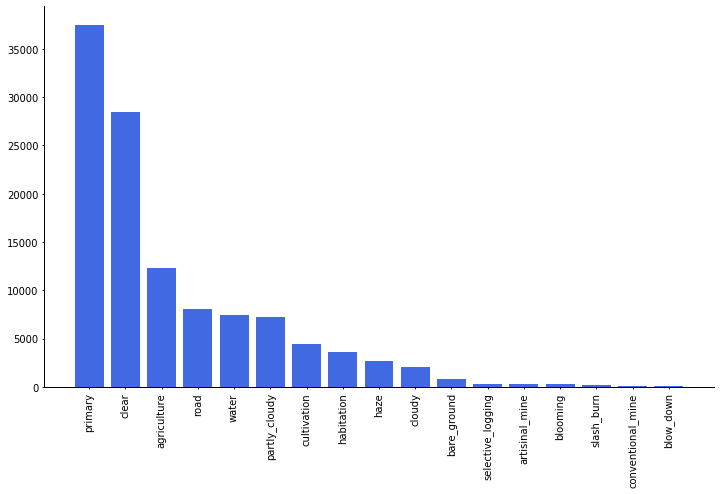

In [ ]:
plt.figure(figsize=(12,7))
plt.bar(x,fr_dataset,color='royalblue')
plt.xticks(rotation='vertical')
sb.despine()

In [ ]:
print(Y.image_name.values[1])
img = cv2.imread(Y.image_name.values[1])
h,w,c = img.shape
print('TAMAÑO DE LAS IMÁGENES:', h,w,c)

train-jpg/train_1.jpg
TAMAÑO DE LAS IMÁGENES: 256 256 3


In [ ]:
X=[]
for im in range(len(Y.image_name)):
  if im>19:
    break
  try:
    img = cv2.imread(Y.image_name.values[im])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    X.append(img)
  except:
    print('ERROR - NO EXISTE: ',Y.image_name.values[im])  

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


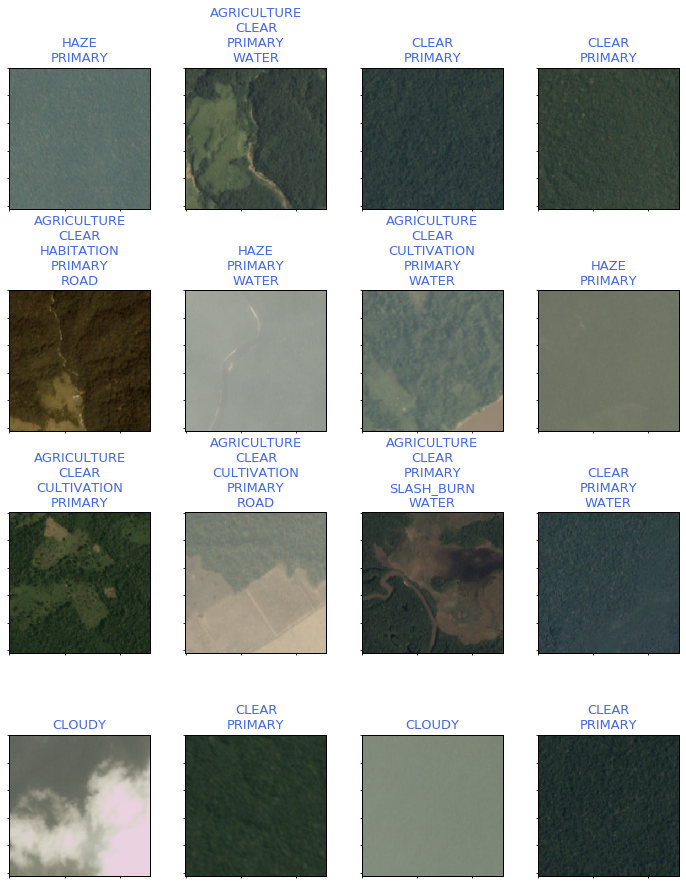

In [ ]:
fig = plt.figure(figsize=(12,15))
for i in range(16): 
  ax = fig.add_subplot(4,4,i+1)
  plt.imshow(X[i])
  plt.title(Y.labels.str.upper().str.replace('|','\n').values[i],fontdict={'color':'royalblue','fontsize':13})
  ax.yaxis.set_major_formatter(NullFormatter())
  ax.xaxis.set_major_formatter(NullFormatter())
  plt.subplots_adjust(hspace=0.5,wspace=0.25)

In [ ]:
Y_corr = Y[['labels']].copy()

In [ ]:
for label in labels:
  Y_corr[label] = np.where(Y_corr.labels.str.contains(label),1,0)

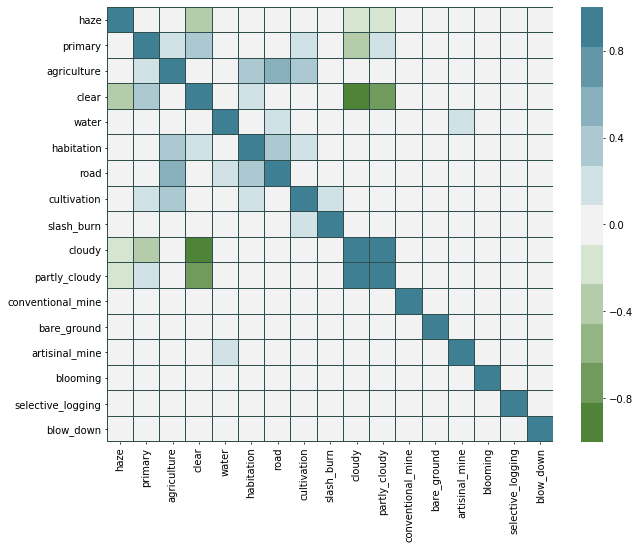

In [ ]:
plt.figure(figsize=(10,8))
colormap = sb.diverging_palette(120, 220,n=11,as_cmap=False)
sb.heatmap(Y_corr[Y_corr.columns[1:]].corr(),cmap=colormap,vmin=-1,vmax=1,linecolor='darkslategray',linewidths=0.01)

In [ ]:
del [[Y_corr]]
gc.collect()
Y_corr=pd.DataFrame()

In [ ]:
Y['sorted_tags'] = Y.tags.apply(lambda x: list(np.sort(x)))
matriz_transacciones = Y.sorted_tags.tolist()
matriz_transacciones[:5]
itemsets, rules = apriori(matriz_transacciones, min_support=0., min_confidence=0.,max_length=2, verbosity=1)
dic2 = itemsets[2]
db_itemsets = []
for i in range(len(dic2)):
  db_itemsets.append({'itemset':list(dic2.keys())[i],'ocurrencias':list(dic2.values())[i]})
db_itemsets = pd.DataFrame(db_itemsets)

db_itemsets = db_itemsets.sort_values('ocurrencias',ascending=False)
db_itemsets.itemset = db_itemsets.itemset.astype(str)



#for i in range(len(rules)):
#  print('ANTECEDENTE: ',rules[i].lhs[0],' CONSECUENTE: ',rules[i].rhs[0],
#        '\nSoporte: ',round(rules[i].support,2),
#        'Confianza: ',round(rules[i].confidence,2),
#        'Conviccion: ',round(rules[i].conviction,2),
#        'Lift: ',round(rules[i].lift,2),'\n-----------------------------------------------')

Generating itemsets.
 Counting itemsets of length 1.
  Found 17 candidate itemsets of length 1.
  Found 17 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 136 candidate itemsets of length 2.
  Found 136 large itemsets of length 2.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

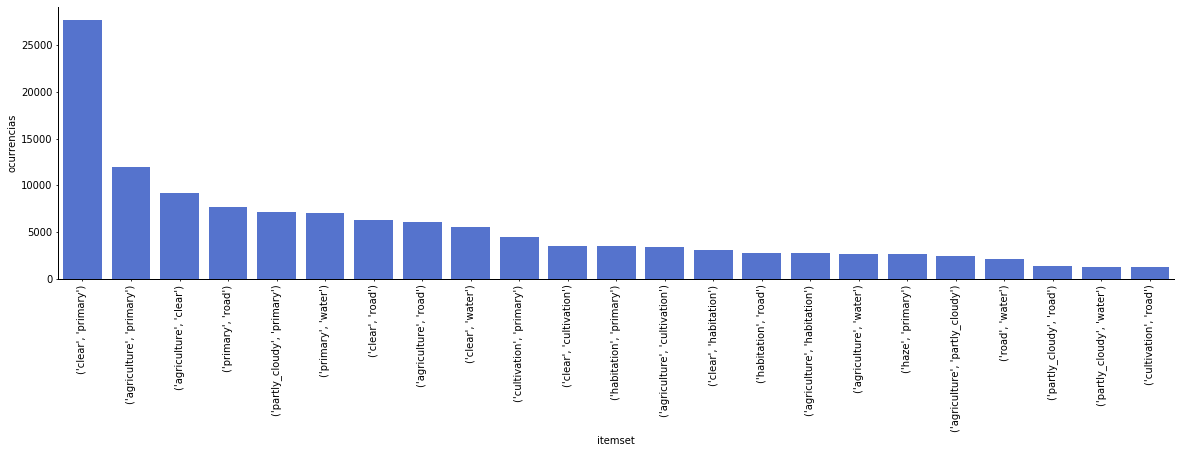

In [ ]:
plt.figure(figsize=(20,5))
sb.barplot(x='itemset',y='ocurrencias',data=db_itemsets[(db_itemsets.ocurrencias>=1000)],color='royalblue')
sb.despine()
plt.xticks(rotation='vertical')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

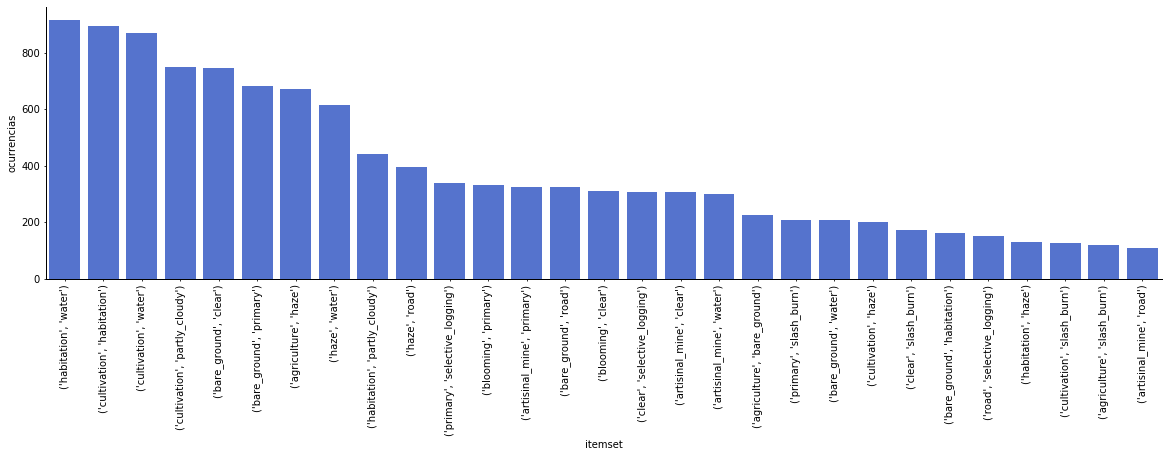

In [ ]:
plt.figure(figsize=(20,5))
sb.barplot(x='itemset',y='ocurrencias',data=db_itemsets[(db_itemsets.ocurrencias<1000)&
                                                        (db_itemsets.ocurrencias>=100)],color='royalblue')
sb.despine()
plt.xticks(rotation='vertical')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

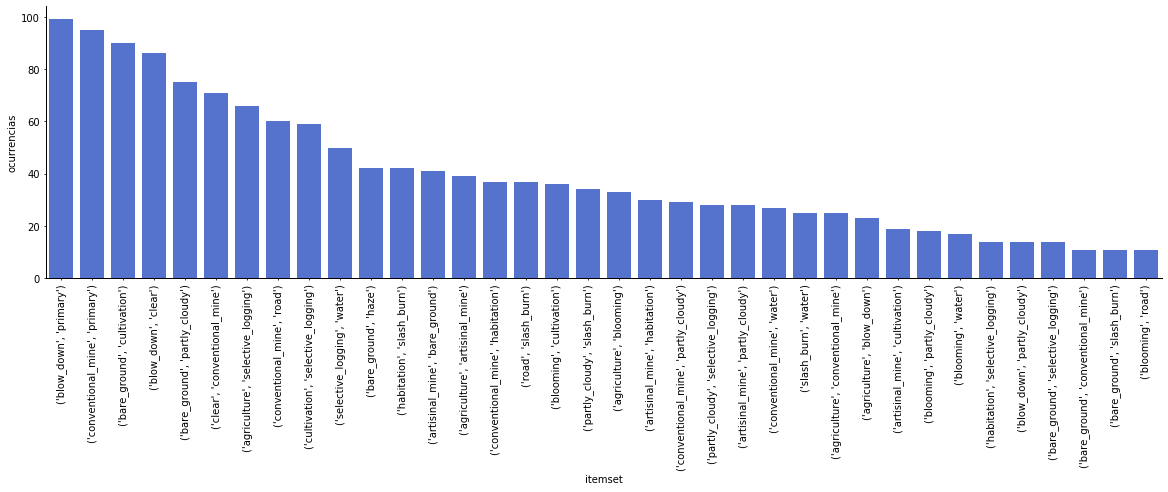

In [ ]:
plt.figure(figsize=(20,5))
sb.barplot(x='itemset',y='ocurrencias',data=db_itemsets[(db_itemsets.ocurrencias<100)&
                                                        (db_itemsets.ocurrencias>=10)],color='royalblue')
sb.despine()
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

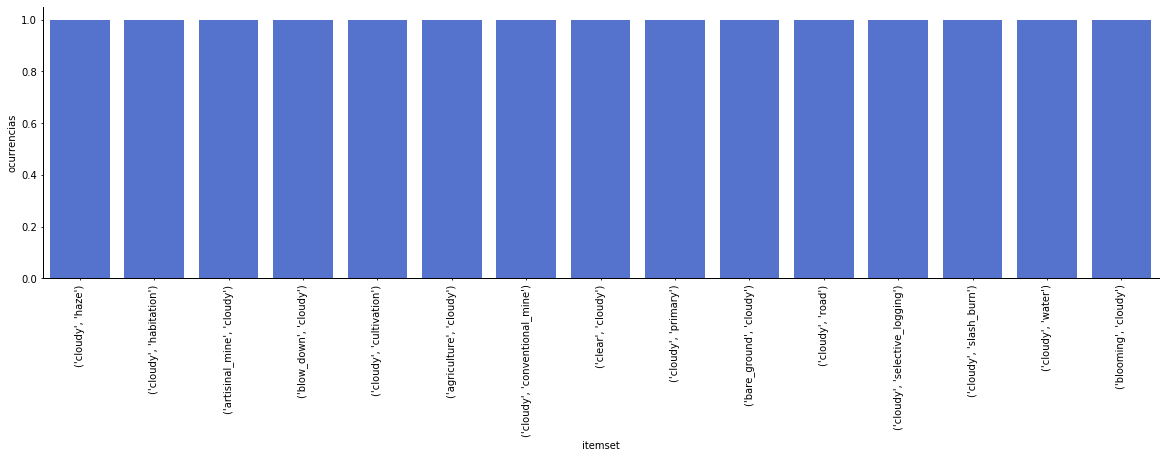

In [ ]:
plt.figure(figsize=(20,5))
sb.barplot(x='itemset',y='ocurrencias',data=db_itemsets[(db_itemsets.itemset.str.contains('cloudy'))&
                                                        (db_itemsets.itemset.str.contains('partly')==False)],color='royalblue')
sb.despine()
plt.xticks(rotation='vertical')

## Conjunto de entrenamiento

En base al análisis anterior, decida como separará sus datos en conjuntos de entrenamiento y testing.

In [ ]:
#X = []
#X_names = []
#for path_image in Y.image_name:
#  try:
#    img = cv2.imread(path_image)
#    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#    X.append(img)
#    X_names.append(path_image)
#  except:
#    print('ERROR - NO EXISTE: ',path_image)  

#for i in range(len(X_names)):
#  if X_names[i]!=Y.image_name.values[i]:
#    print('ERROR EN POSICIÓN',i) 
#  if i==len(X_names)-1:
#    print('TERMINÉ')

In [ ]:
test  = Y.sample(frac=0.1, random_state=117)
train = Y[Y.image_name.isin(test.image_name)==False]

In [ ]:
print('CORROBORO\n- TEST:', round(len(test)/len(Y),2),'\n- TRAIN:', round(len(train)/len(Y),2))

CORROBORO
- TEST: 0.1 
- TRAIN: 0.9


In [ ]:
fr_train = []
fr_test  = []
for l in x:
  frecuencia_train = len(train[train.labels.str.contains(r'\b'+l+r'\b')])
  frecuencia_test  = len(test[test.labels.str.contains(r'\b'+l+r'\b')])
  fr_train.append(frecuencia_train)
  fr_test.append(frecuencia_test)

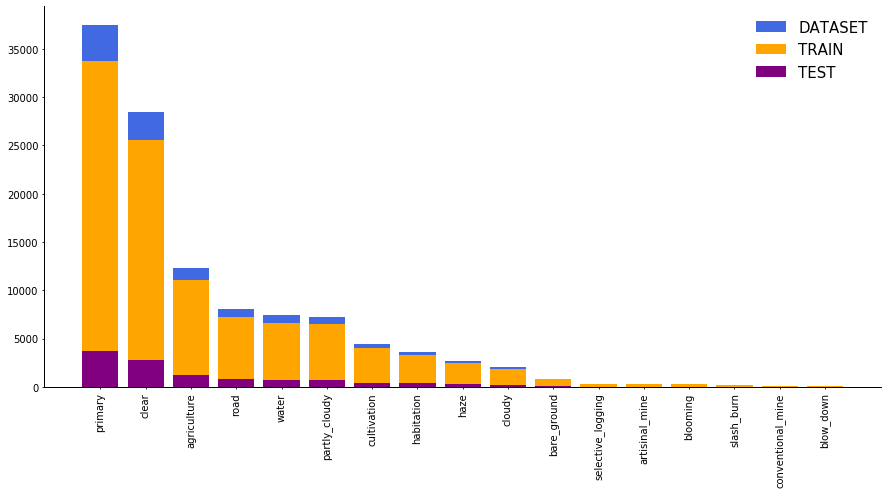

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x,fr_dataset,label='DATASET',color='royalblue')
plt.bar(x,fr_train,label='TRAIN',color='orange')
plt.bar(x,fr_test,label='TEST',color='purple')
plt.xticks(rotation='vertical')
plt.legend(frameon=False)
sb.despine()

In [ ]:
path='/content/drive/My Drive/CNN/experiment_003/'
csv_name = 'entrenamiento.csv'

In [ ]:
num_clases     = len(labels)
nb_epoch       = 20
batch_size     = 3000

In [ ]:
TRAIN = True

In [ ]:
if TRAIN:
  datagenTrain          = ImageDataGenerator(rescale = 1/255,validation_split=0.2)
  datagenTest           = ImageDataGenerator(rescale = 1/255)

In [ ]:
if TRAIN:
  train_generator = datagenTrain.flow_from_dataframe(
  dataframe   = train,
  x_col       = 'image_name',
  y_col       = 'tags',
  subset      = 'training',
  batch_size  = 32,
  seed        = 42,
  shuffle     = True,
  class_mode  = 'categorical',
  target_size = (256,256))

  valid_generator = datagenTrain.flow_from_dataframe(
  dataframe   = train,
  x_col       = 'image_name',
  y_col       = 'tags',
  subset      = 'validation',
  batch_size  = 32,
  seed        = 42,
  shuffle     = True,
  class_mode  = 'categorical',
  target_size = (256,256))

  test_generator = datagenTest.flow_from_dataframe(
  dataframe   = test,
  x_col       = 'image_name',
  y_col       = None,
  batch_size  = 32,
  seed        = 42,
  shuffle     = False,
  class_mode  = None,
  target_size = (256,256))

Found 29145 validated image filenames belonging to 17 classes.
Found 7286 validated image filenames belonging to 17 classes.
Found 4048 validated image filenames.


## Elección de modelo

Elija un modelo de red convolucional para entrenar sobre sus datos. Puede armar su propia red convolucional de cero o utilizar una de las provistas por `Keras` en [Applications](https://keras.io/applications/).

Piense como debería ser la capa de clasificación de su modelo y la función de costo a utilizar durante el entrenamiento al tratarse de un problema del tipo multi-label classification.

In [ ]:
if TRAIN:
  model = Sequential()
  model.add(Conv2D(16,(3, 3), input_shape=(256, 256, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(16,(3, 3)))
  model.add(Activation('relu'))
  model.add(Dropout(0.25)) 
  model.add(Flatten()) 
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_clases))
  model.add(Activation('sigmoid'))
 
  optimizer = keras.optimizers.Adam()

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])  

In [ ]:
if TRAIN:
  csv_logger     = CSVLogger(path+csv_name, separator='|', append=True)
  early_stop     = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)  
  reduce_lr      = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4) 
  model_check    = ModelCheckpoint(filepath=path+'weights.{epoch:02d}-{val_loss:.2f}.hdf5',
                                  monitor='val_loss',
                                  verbose=1, 
                                  save_best_only=False, 
                                  save_weights_only=True, 
                                  mode='auto')

  tensor_board   = TensorBoard(log_dir=path+'logs', 
                               write_graph=True, 
                               write_images=False)

  callbacks_list = [early_stop,reduce_lr,model_check,csv_logger,tensor_board]  


## Entrenamiento

Entrene y muestre los resultados obtenidos en cada epoch para con su modelo.

In [ ]:
if TRAIN:
  model.load_weights(path+'weights.20-0.23.hdf5')
  model.fit_generator(
      train_generator,
      epochs=nb_epoch,
      initial_epoch=20,
      validation_data=valid_generator,
      callbacks=callbacks_list,
      )

In [ ]:
logger          = pd.read_csv(path+csv_name,sep='|',names=['epoca','train_acc','train_loss','unknown','val_acc','val_loss'],skiprows=6)
logger          = logger[['epoca','train_acc','train_loss','val_acc','val_loss']]
logger['epoca'] = logger['epoca'] +1
logger          = logger.set_index('epoca')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


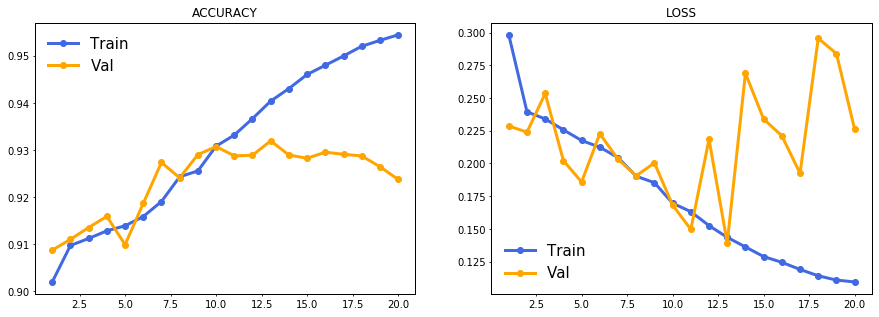

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(logger.index,logger.train_acc, label='Train', color='royalblue',lw=3,marker='o')
plt.plot(logger.index,logger.val_acc, label='Val', color='orange',lw=3,marker='o')
plt.title('ACCURACY')
plt.legend(frameon=False)


plt.subplot(122)
plt.plot(logger.index,logger.train_loss, label='Train', color='royalblue',lw=3,marker='o')
plt.plot(logger.index,logger.val_loss, label='Val', color='orange',lw=3,marker='o')
plt.title('LOSS')
plt.legend(frameon=False)


## Evaluación

Muestre debajo los resultados del modelo en su conjunto de testing. Elija las métricas apropiadas para este tipo de problema.

In [ ]:
evaluation = model.evaluate_generator(generator=valid_generator,verbose=1)

print('Test loss:', round(evaluation[0],2))
print('Test accuracy:', round(evaluation[1],2))

228/228 [==============================] - 157s 690ms/step
Test loss: 0.28
Test accuracy: 0.92


In [ ]:
filenames = test_generator.filenames
predictions = []
for i,path_image in enumerate(filenames):
  #if i>0: break
  try:
    img = cv2.imread(path_image)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.expand_dims(img, axis=0)
    predictions.append({'image_name':path_image,'predictions':(model.predict(img))})
    if i%500==0:
      print('VOY POR PASO: ',i)
  except:
    print('ERROR', path_image)  


VOY POR PASO:  0
VOY POR PASO:  500
VOY POR PASO:  1000
VOY POR PASO:  1500
VOY POR PASO:  2000
VOY POR PASO:  2500
VOY POR PASO:  3000
VOY POR PASO:  3500
VOY POR PASO:  4000


In [ ]:
predictionsDB = pd.DataFrame(predictions)
predictionsDB.to_csv(path+'predictions.csv',sep='|')
predictionsDB.to_excel(path+'predictions.xlsx')

dict_clases     = train_generator.class_indices
inv_dict_clases = {value: key for key, value in dict_clases.items()}
inv_dict_clases

{0: 'agriculture',
 1: 'artisinal_mine',
 2: 'bare_ground',
 3: 'blooming',
 4: 'blow_down',
 5: 'clear',
 6: 'cloudy',
 7: 'conventional_mine',
 8: 'cultivation',
 9: 'habitation',
 10: 'haze',
 11: 'partly_cloudy',
 12: 'primary',
 13: 'road',
 14: 'selective_logging',
 15: 'slash_burn',
 16: 'water'}

In [ ]:
predictions_labels = []
for i in range(len(predictionsDB)):
  predictions_labels_img = []
  for j in range(num_clases):
    probability = predictionsDB.predictions.values[i][0][j]
    if probability>=0.5:
      predictions_labels_img.append(inv_dict_clases[j])
  predictions_labels.append({'image_name':predictionsDB.image_name.values[i],
                             'predicted_labels':predictions_labels_img})
  if i%300==0: 
    print(predictions_labels_img)

['cloudy', 'partly_cloudy']
['cloudy']
['cloudy', 'partly_cloudy']
['cloudy', 'partly_cloudy']
['cloudy', 'partly_cloudy']
['cloudy']
['cloudy', 'partly_cloudy']
['cloudy', 'partly_cloudy']
['cloudy', 'partly_cloudy']
['cloudy', 'partly_cloudy']
['cloudy', 'partly_cloudy']
['cloudy', 'partly_cloudy']
['cloudy', 'partly_cloudy']
['cloudy']


In [ ]:
predictions_labelsDB=pd.DataFrame(predictions_labels)
predictionsDB = predictionsDB.merge(predictions_labelsDB,on='image_name',how='left')
predictionsDB = predictionsDB.merge(Y[['image_name','tags']],on='image_name',how='left')
predictionsDB = predictionsDB[['image_name','tags','predicted_labels']].rename(columns={'tags':'true_labels'})
predictionsDB

image_name  ...          predicted_labels
0     train-jpg/train_12787.jpg  ...   [cloudy, partly_cloudy]
1     train-jpg/train_12123.jpg  ...                  [cloudy]
2     train-jpg/train_14110.jpg  ...  [partly_cloudy, primary]
3      train-jpg/train_6110.jpg  ...                  [cloudy]
4     train-jpg/train_17853.jpg  ...                  [cloudy]
...                         ...  ...                       ...
4043    train-jpg/train_798.jpg  ...   [cloudy, partly_cloudy]
4044   train-jpg/train_3180.jpg  ...   [cloudy, partly_cloudy]
4045   train-jpg/train_9523.jpg  ...   [cloudy, partly_cloudy]
4046  train-jpg/train_29607.jpg  ...  [partly_cloudy, primary]
4047  train-jpg/train_19878.jpg  ...   [cloudy, partly_cloudy]

[4048 rows x 3 columns]

In [ ]:
X=[]

for im in range(len(predictionsDB.image_name)):
  if im>39:
    break
  try:
    img = cv2.imread(predictionsDB.image_name.values[im])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    X.append(img)
  except:
    print('ERROR - NO EXISTE: ',predictionsDB.image_name.values[im])  

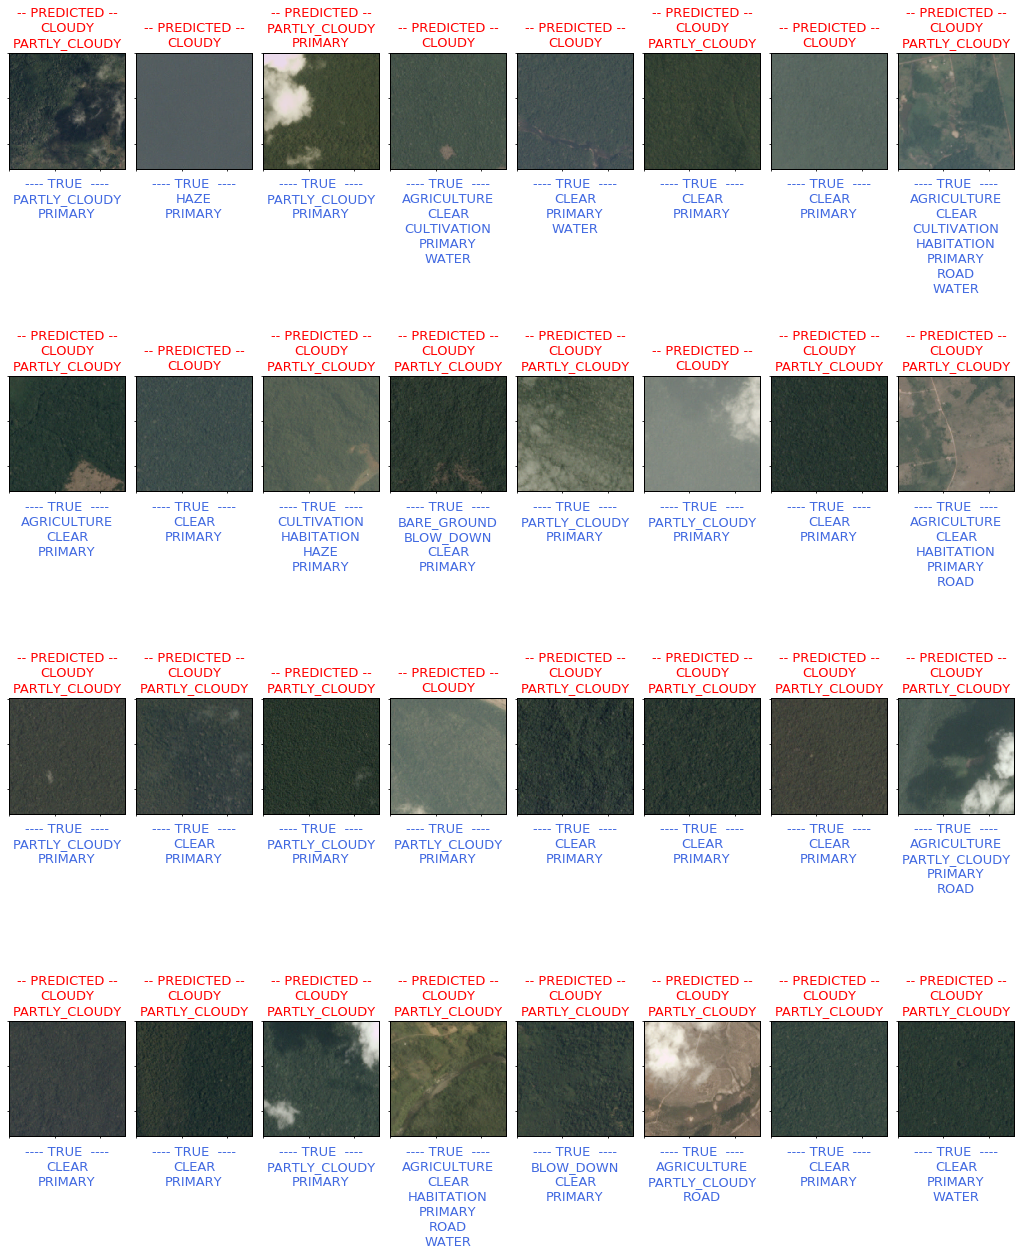

In [ ]:
fig = plt.figure(figsize=(18,20))
for i in range(32): 
  ax = fig.add_subplot(4,8,i+1)
  plt.imshow(X[i])
  plt.title('-- PREDICTED --\n'+predictionsDB.predicted_labels.str.join('|').str.upper().str.replace('|','\n').values[i],fontdict={'color':'red','fontsize':13})
  ax.yaxis.set_major_formatter(NullFormatter())
  ax.xaxis.set_major_formatter(NullFormatter())
  plt.xlabel('---- TRUE  ----\n'+predictionsDB.true_labels.str.join('|').str.upper().str.replace('|','\n').values[i],fontdict={'color':'royalblue','fontsize':13})
  plt.subplots_adjust(hspace=1.7,wspace=0.1)

In [ ]:
fr_pred = []
for l in x:
  frecuencia_pred = len(predictionsDB[predictionsDB.predicted_labels.str.join('|').str.contains(r'\b'+l+r'\b')])
  fr_pred.append(frecuencia_pred) 
  

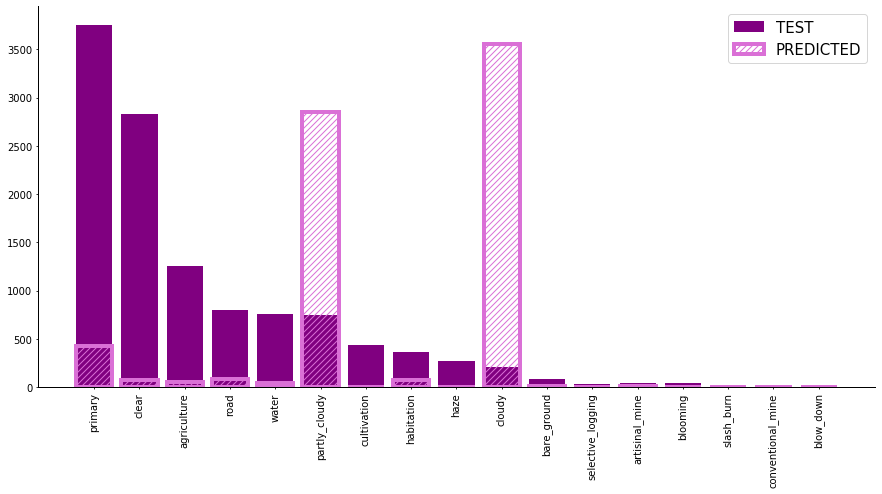

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x,np.array(fr_test),label='TEST',color='purple')
plt.bar(x,np.array(fr_pred),label='PREDICTED',edgecolor='orchid',hatch='////',facecolor='None',lw=4)
plt.xticks(rotation='vertical')
plt.legend()
sb.despine()

#-------------------------------------------                             -------------------------------------------
#-------------------------------------------                             -------------------------------------------


## Data Augmentation

Proponga algún de pre-procesamiento y aumentado de datos, visualice los resultados del método propuesto. Puede experimentar y elegir el que mejor funcione en sus entrenamientos.

**Ayuda:** Al tener sus anotaciones en formato csv, lo mas sensillo sería utilizar el método [flow_from_dataframe](https://keras.io/preprocessing/image/#flow_from_dataframe) de la clase `ImageDataGenerator` de `Keras`.

In [ ]:
path='/content/drive/My Drive/CNN/experiment_004/'

In [ ]:
if TRAIN:
  datagenTrainAugmented = ImageDataGenerator(rescale = 1/255,
                                           validation_split=0.2,
                                           rotation_range=15,
                                           shear_range=0.01,
                                           horizontal_flip=True,
                                           vertical_flip=False,
                                           fill_mode='reflect',
                                           data_format='channels_last',
                                           brightness_range=(0.2,0.8))

In [ ]:
if TRAIN:
  train_generator = datagenTrainAugmented.flow_from_dataframe(
  dataframe   = train,
  x_col       = 'image_name',
  y_col       = 'tags',
  subset      = 'training',
  batch_size  = 32,
  seed        = 42,
  shuffle     = True,
  class_mode  = 'categorical',
  target_size = (256,256))

  valid_generator = datagenTrainAugmented.flow_from_dataframe(
  dataframe   = train,
  x_col       = 'image_name',
  y_col       = 'tags',
  subset      = 'validation',
  batch_size  = 32,
  seed        = 42,
  shuffle     = True,
  class_mode  = 'categorical',
  target_size = (256,256))

  test_generator = datagenTest.flow_from_dataframe(
  dataframe   = test,
  x_col       = 'image_name',
  y_col       = None,
  batch_size  = 32,
  seed        = 42,
  shuffle     = False,
  class_mode  = None,
  target_size = (256,256))

Found 29145 validated image filenames belonging to 17 classes.
Found 7286 validated image filenames belonging to 17 classes.
Found 4048 validated image filenames.


## Elección de modelo


In [ ]:
if TRAIN:
  model = Sequential()
  model.add(Conv2D(16,(3, 3), input_shape=(256, 256, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(16,(3, 3)))
  model.add(Activation('relu'))
  model.add(Dropout(0.25)) 
  model.add(Flatten()) 
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_clases))
  model.add(Activation('sigmoid'))
 
  optimizer = keras.optimizers.Adam()

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])  

In [ ]:
if TRAIN:
  csv_logger     = CSVLogger(path+csv_name, separator='|', append=True)
  early_stop     = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)  
  reduce_lr      = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4) 
  model_check    = ModelCheckpoint(filepath=path+'weights.{epoch:02d}-{val_loss:.2f}.hdf5',
                                  monitor='val_loss',
                                  verbose=1, 
                                  save_best_only=False, 
                                  save_weights_only=True, 
                                  mode='auto')

  tensor_board   = TensorBoard(log_dir=path+'logs', 
                               write_graph=True, 
                               write_images=False)

  callbacks_list = [early_stop,reduce_lr,model_check,csv_logger,tensor_board]  

## ENTRENAMIENTO

In [ ]:
if TRAIN:
  model.load_weights(path+'weights.20-0.23.hdf5')
  model.fit_generator(
      train_generator,
      epochs=nb_epoch,
      initial_epoch=20,
      validation_data=valid_generator,
      callbacks=callbacks_list,
      )

In [ ]:
logger          = pd.read_csv(path+csv_name,sep='|',names=['epoca','train_acc','train_loss','unknown','val_acc','val_loss'],skiprows=6)
logger          = logger[['epoca','train_acc','train_loss','val_acc','val_loss']]
logger['epoca'] = logger['epoca'] +1
logger 

epoca  train_acc  train_loss   val_acc  val_loss
0       6   0.910332    0.222271  0.910392  0.153728
1       7   0.910276    0.222382  0.911127  0.210330
2       8   0.910882    0.219487  0.911716  0.153533
3       9   0.911519    0.218255  0.912653  0.154292
4      10   0.911719    0.217673  0.912394  0.235094
5      11   0.912131    0.217338  0.911474  0.232049
6      12   0.912250    0.216815  0.913121  0.238491
7      13   0.912268    0.217260  0.910554  0.196293
8      14   0.912196    0.217486  0.913379  0.241218
9      15   0.912666    0.216757  0.913541  0.225219
10     16   0.912468    0.215845  0.912653  0.139188
11     17   0.912504    0.215772  0.913258  0.209065
12     18   0.912629    0.215183  0.913178  0.162377
13     19   0.912797    0.214888  0.913234  0.169325
14     20   0.912543    0.214391  0.912935  0.232579

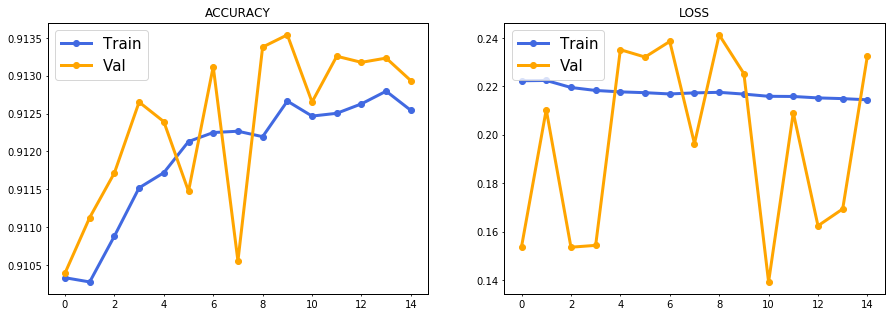

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(logger.index,logger.train_acc, label='Train', color='royalblue',lw=3,marker='o')
plt.plot(logger.index,logger.val_acc, label='Val', color='orange',lw=3,marker='o')
plt.title('ACCURACY')
plt.legend()


plt.subplot(122)
plt.plot(logger.index,logger.train_loss, label='Train', color='royalblue',lw=3,marker='o')
plt.plot(logger.index,logger.val_loss, label='Val', color='orange',lw=3,marker='o')
plt.title('LOSS')
plt.legend()

## EVALUACIÓN

In [ ]:
evaluation = model.evaluate_generator(generator=valid_generator,verbose=1)

228/228 [==============================] - 258s 1s/step


In [ ]:
print('Test loss:', round(evaluation[0],2))
print('Test accuracy:', round(evaluation[1],2))

Test loss: 0.23
Test accuracy: 0.91


In [ ]:
filenames = test_generator.filenames
predictions = []
for i,path_image in enumerate(filenames):
  #if i>0: break
  try:
    img = cv2.imread(path_image)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.expand_dims(img, axis=0)
    predictions.append({'image_name':path_image,'predictions':(model.predict(img))})
    if i%500==0:
      print('VOY POR PASO: ',i)
  except:
    print('ERROR', path_image) 

VOY POR PASO:  0
VOY POR PASO:  500
VOY POR PASO:  1000
VOY POR PASO:  1500
VOY POR PASO:  2000
VOY POR PASO:  2500
VOY POR PASO:  3000
VOY POR PASO:  3500
VOY POR PASO:  4000


In [ ]:
predictionsDB = pd.DataFrame(predictions)

predictionsDB.to_csv(path+'predictions.csv',sep='|')
predictionsDB.to_excel(path+'predictions.xlsx')

dict_clases     = train_generator.class_indices
inv_dict_clases = {value: key for key, value in dict_clases.items()}
inv_dict_clases

{0: 'agriculture',
 1: 'artisinal_mine',
 2: 'bare_ground',
 3: 'blooming',
 4: 'blow_down',
 5: 'clear',
 6: 'cloudy',
 7: 'conventional_mine',
 8: 'cultivation',
 9: 'habitation',
 10: 'haze',
 11: 'partly_cloudy',
 12: 'primary',
 13: 'road',
 14: 'selective_logging',
 15: 'slash_burn',
 16: 'water'}

In [ ]:
predictions_labels = []
for i in range(len(predictionsDB)):
  predictions_labels_img = []
  for j in range(num_clases):
    probability = predictionsDB.predictions.values[i][0][j]
    if probability>=0.5:
      predictions_labels_img.append(inv_dict_clases[j])
  predictions_labels.append({'image_name':predictionsDB.image_name.values[i],
                             'predicted_labels':predictions_labels_img})
  if i%300==0: 
    print(predictions_labels_img)

['clear', 'primary']
[]
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['cloudy']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['primary']
['cloudy']


In [ ]:
predictions_labelsDB=pd.DataFrame(predictions_labels)
predictionsDB = predictionsDB.merge(predictions_labelsDB,on='image_name',how='left')
predictionsDB = predictionsDB.merge(Y[['image_name','tags']],on='image_name',how='left')
predictionsDB = predictionsDB[['image_name','tags','predicted_labels']].rename(columns={'tags':'true_labels'})
predictionsDB

image_name  ...  predicted_labels
0     train-jpg/train_12787.jpg  ...  [clear, primary]
1     train-jpg/train_12123.jpg  ...          [cloudy]
2     train-jpg/train_14110.jpg  ...  [clear, primary]
3      train-jpg/train_6110.jpg  ...  [clear, primary]
4     train-jpg/train_17853.jpg  ...  [clear, primary]
...                         ...  ...               ...
4043    train-jpg/train_798.jpg  ...  [clear, primary]
4044   train-jpg/train_3180.jpg  ...  [clear, primary]
4045   train-jpg/train_9523.jpg  ...  [clear, primary]
4046  train-jpg/train_29607.jpg  ...  [clear, primary]
4047  train-jpg/train_19878.jpg  ...  [clear, primary]

[4048 rows x 3 columns]

In [ ]:
X=[]

for im in range(len(predictionsDB.image_name)):
  if im>39:
    break
  try:
    img = cv2.imread(predictionsDB.image_name.values[im])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    X.append(img)
  except:
    print('ERROR - NO EXISTE: ',predictionsDB.image_name.values[im])  

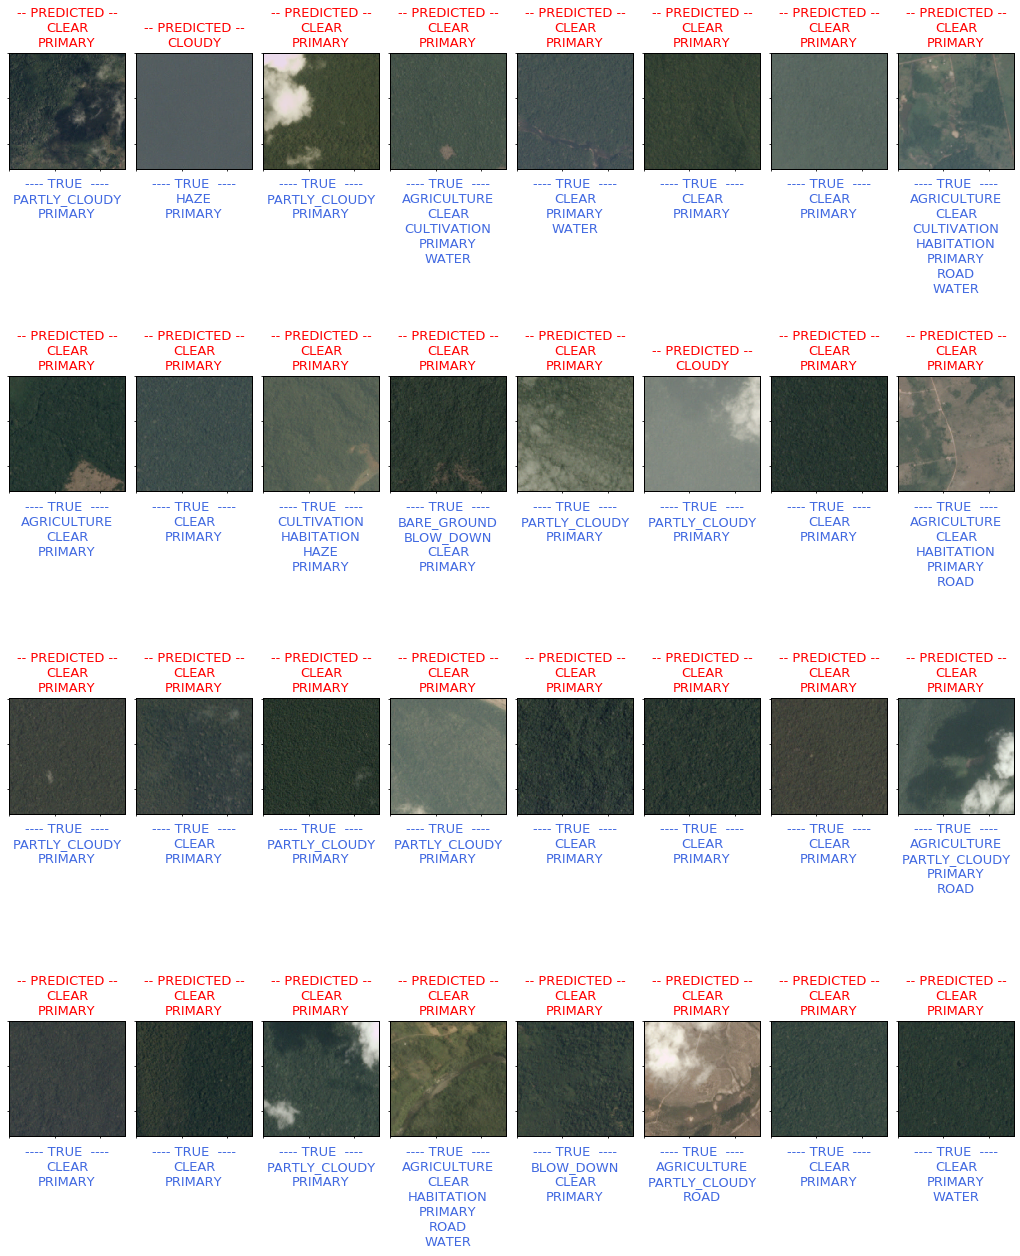

In [ ]:
fig = plt.figure(figsize=(18,20))
for i in range(32): 
  ax = fig.add_subplot(4,8,i+1)
  plt.imshow(X[i])
  plt.title('-- PREDICTED --\n'+predictionsDB.predicted_labels.str.join('|').str.upper().str.replace('|','\n').values[i],fontdict={'color':'red','fontsize':13})
  ax.yaxis.set_major_formatter(NullFormatter())
  ax.xaxis.set_major_formatter(NullFormatter())
  plt.xlabel('---- TRUE  ----\n'+predictionsDB.true_labels.str.join('|').str.upper().str.replace('|','\n').values[i],fontdict={'color':'royalblue','fontsize':13})
  plt.subplots_adjust(hspace=1.7,wspace=0.1)

In [ ]:
fr_pred = []
for l in x:
  frecuencia_pred = len(predictionsDB[predictionsDB.predicted_labels.str.join('|').str.contains(r'\b'+l+r'\b')])
  fr_pred.append(frecuencia_pred) 

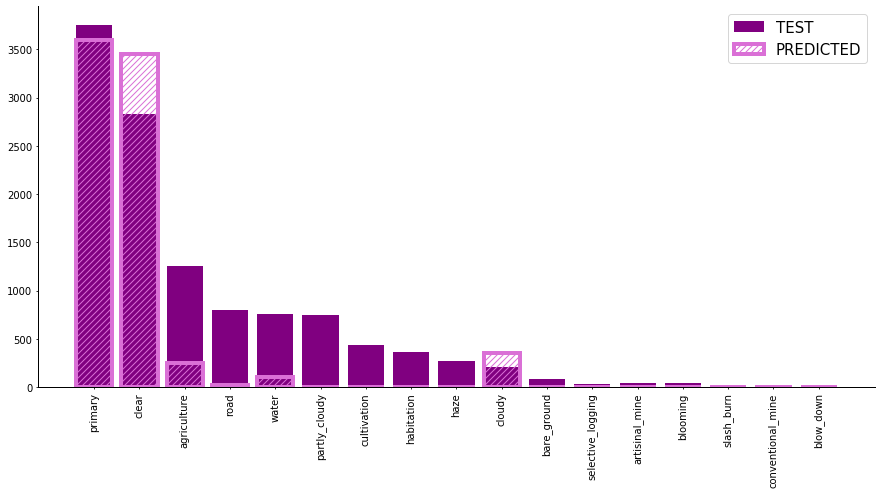

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x,np.array(fr_test),label='TEST',color='purple')
plt.bar(x,np.array(fr_pred),label='PREDICTED',edgecolor='orchid',hatch='////',facecolor='None',lw=4)
plt.xticks(rotation='vertical')
plt.legend()
sb.despine()